In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
df=pd.read_csv("Animation_Movies.csv")
df["release_date"]=pd.to_datetime(df["release_date"])

In [3]:
list(df.columns)

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'backdrop_path',
 'budget',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'tagline',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages']

In [98]:
nb_countries=8

df_top_countries=df.groupby("production_countries").agg("count").sort_values(by="revenue",ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["production_countries"].values)

[Text(0, 0, 'United States of America'),
 Text(1, 0, 'France'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Russia'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Japan'),
 Text(7, 0, 'Soviet Union')]

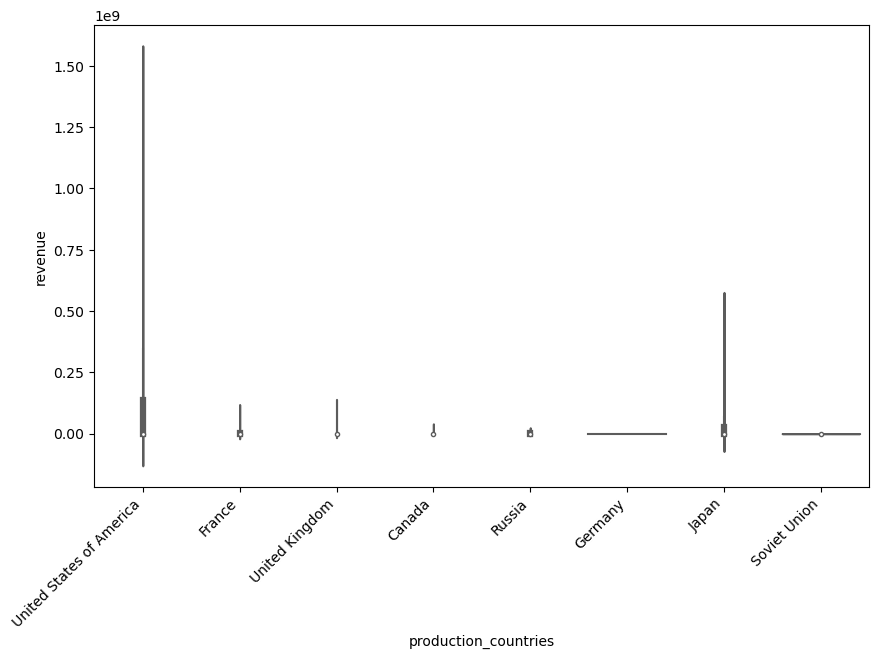

In [99]:
plt.figure(figsize=(10, 6))
df_to_show=df[(df["budget"]!=0)&(df["production_countries"].isin(list_top_countries))]
ax =sns.violinplot(x="production_countries", y="revenue", data=df_to_show,palette=sns.color_palette("hls",n_colors=nb_countries))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


In [23]:
@interact
def show_articles_more_than(column=['revenue',"budget"],metric=["count","sum"], nb_countries=5):
    # df=df[df["release_date"]>start_date]
    
    plt.figure(figsize=(10, 6))
    # nb_countries=8
    # df_loc=df[(df[column]>lower_bar)]
    df_loc=df.copy()

    df_top_countries=df_loc.groupby("production_countries").agg(metric).sort_values(by=column,ascending=False)[:nb_countries].reset_index()
    list_top_countries=list(df_top_countries["production_countries"].values)
    df_to_show=df_loc[(df_loc[column]!=0)&(df_loc["production_countries"].isin(list_top_countries))]
    ax =sns.boxplot(x="production_countries", y="revenue", data=df_to_show,palette=sns.color_palette("hls",n_colors=nb_countries))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yscale("log")

interactive(children=(Dropdown(description='column', options=('revenue', 'budget'), value='revenue'), Dropdown…

In [132]:
def show_articles_more_than(df,start_date,end_date):
    start_date=pd.Timestamp(start_date)
    df=df[df["release_date"]>start_date]
    
    
    # nb_countries=8

    df_top_countries=df.groupby("production_countries").agg("count").sort_values(by="revenue",ascending=False)[:nb_countries].reset_index()
    list_top_countries=list(df_top_countries["production_countries"].values)
    df_to_show=df[(df["budget"]!=0)&(df["production_countries"].isin(list_top_countries))]
    ax =sns.violinplot(x="production_countries", y="revenue", data=df_to_show,palette=sns.color_palette("hls",n_colors=nb_countries))

interact(show_articles_more_than,df=widgets.fixed(df),
    start_date=widgets.DatePicker(value=pd.to_datetime('2015-01-01')),
    end_date)

interactive(children=(DatePicker(value=Timestamp('2015-01-01 00:00:00'), description='start_date'), Output()),…

<function __main__.show_articles_more_than(df, start_date)>

c:\ProgramData\Anaconda3\lib\site-packages\traitlets\traitlets.py:588: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  silent = bool(old_value == new_value)
